Importación de librerias

In [2]:
import pandas as pd
from pandas import json_normalize # Importamos la función json_normalize de pandas para trabajar con datos JSON anidados. 
import json as js 
import matplotlib.pyplot as plt


# Análisis EDA para el archivo "review.json" de Yelp

#### Importar los datos

In [4]:
# Debido al tamaño del archivo se extrae sólo el primer millón de registros:
num_registros = 1000000

In [5]:
# Lee sólo el número de registros indicado
df = pd.read_json(r'C:\Users\Sofi\Desktop\Henry\LABS\Borrador_PF\PF\Data\Yelp\review.json', lines=True, nrows=num_registros)

In [6]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
999995,t-2o35kr7Q9DSaeuKhaDuQ,oX7o1TH0PHUWp9r9ry9_vw,jLn69WQupjsDKrbPw_nlGQ,3,0,1,0,Never really had any issues here other than th...,2017-11-15 09:43:07
999996,fLIwWCvdul9PNWYfJt5QWA,v8wlapFKVLs2qTYCGhCdiw,t6v8g8UeNiq3O2GoEc7R4Q,4,0,0,0,Fish recently moved a couple of doors down the...,2014-09-03 18:27:33
999997,ETAiy6wEM-r9ve4SKDhBpg,rLlYc1RzIBnOmnX3AbpEYw,ZYRul0i1bhOjirHED6Kd0w,3,0,0,0,I've been to South House around a dozen or so ...,2016-02-20 22:25:29
999998,8OgvSXuc6KjAt2fSz9LuzA,eEH-8CEPU5ndPxDGzVfHiQ,onGXKwnxPLtKnO8yqQMPSA,1,1,0,1,Wow! I am shocked at these reviews. I have tri...,2010-06-27 02:17:30


In [5]:
df.shape

(1000000, 9)

## Tipo de datos del df

Crear una función para analizar el tipo de datos proporcionados

In [6]:
# Función para revisar el tipo de dato de cada variable del dataset 
def tipo_datos(df):
    mi_dict = {"nombre_campo": [], "tipo_datos": []}
    for columna in df.columns:
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
    return df_info

In [7]:
tipo_datos(df) 

,nombre_campo,tipo_datos
0,review_id,[<class 'str'>]
1,user_id,[<class 'str'>]
2,business_id,[<class 'str'>]
3,stars,[<class 'int'>]
4,useful,[<class 'int'>]
5,funny,[<class 'int'>]
6,cool,[<class 'int'>]
7,text,[<class 'str'>]
8,date,[<class 'pandas._libs.tslibs.timestamps.Timest...


## Valores Nulos

In [8]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Valores Faltantes

In [9]:
df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Valores Duplicados

In [10]:
# Verificar si hay filas duplicadas en todo el DataFrame
duplicados = df.duplicated()
# Cuenta la cantidad de filas duplicadas
cantidad_duplicados = duplicados.sum()
# Muestra la cantidad de filas duplicadas
print("Cantidad de filas duplicadas:", cantidad_duplicados)

Cantidad de filas duplicadas: 0


## Outliers

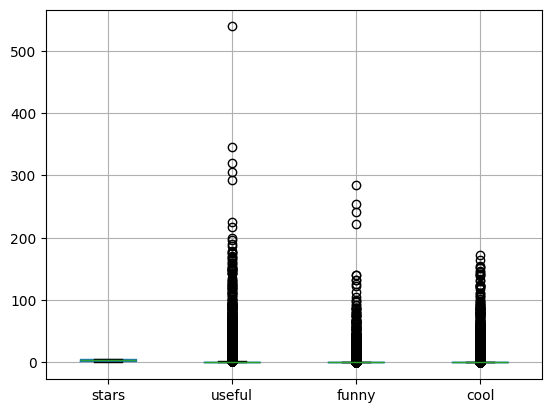

In [12]:
# Visualización con Diagrama de Boxplot:
df.boxplot()
plt.show()

Se observan outliers en las columnas 'useful' y 'funny', por lo tanto se decide explorar en detalle los valores contenidos en estas columnas: 

In [15]:
# Obtén los valores únicos y su conteo para la columna 'stars'
valores_unicos_stars = df['stars'].unique()
conteo_valores_stars = df['stars'].value_counts()

# Obtén los valores únicos y su conteo para la columna 'useful'
valores_unicos_useful = df['useful'].unique()
conteo_valores_useful = df['useful'].value_counts()

# Obtén los valores únicos y su conteo para la columna 'funny'
valores_unicos_funny = df['funny'].unique()
conteo_valores_funny = df['funny'].value_counts()

# Obtén los valores únicos y su conteo para la columna 'cool'
valores_unicos_cool = df['cool'].unique()
conteo_valores_cool = df['cool'].value_counts()

In [16]:
# Muestra los resultados
print("Valores únicos y su conteo para la columna 'stars':")
print(valores_unicos_stars)
print(conteo_valores_stars)

print("\nValores únicos y su conteo para la columna 'useful':")
print(valores_unicos_useful)
print(conteo_valores_useful)

print("\nValores únicos y su conteo para la columna 'funny':")
print(valores_unicos_funny)
print(conteo_valores_funny)

print("\nValores únicos y su conteo para la columna 'cool':")
print(valores_unicos_cool)
print(conteo_valores_cool)

Valores únicos y su conteo para la columna 'stars':
[3 5 4 1 2]
stars
5    458612
4    221897
1    138625
3    102954
2     77912
Name: count, dtype: int64

Valores únicos y su conteo para la columna 'useful':
[  0   1   2   4   3   7  15   5  14   6  11  13   8   9  10  12  16  23
  18  19  34  17  20  61  31  91  54  21  22  28  32  25  29  48  33  27
  46  24 171  30  44  26  70  42  40  39  35  38 320  41  45  37  75  36
  53  74  49  60  43  51  52  63  58 131  55 175  47  56  72 305 112  71
  68  69 179 124  50  73  66  57  65 121  82 135 132  87  98  93 118 539
 163  79 150 102  59  89 142  64  96  78  86  92 109 100 120 151  77 110
 111 160  84  80  62 114 346 152 190 123 115  81 217 199 197  85 149 166
 105 168 169  88 292 146  76 225 176 144 127 126 143 177 129 187  95 106
 148 153 156]
useful
0      562838
1      217272
2       95675
3       47406
4       25729
        ...  
346         1
152         1
190         1
115         1
156         1
Name: count, Length: 147, dtype

## Valores únicos

In [27]:
# Calcular la cantidad de valores únicos en la columna 'user_id'
valores_unicos_user_id = df['user_id'].nunique()
print("Cantidad de ususarios':", valores_unicos_user_id)

Cantidad de ususarios': 542003


In [28]:
# Calcula la cantidad de valores únicos en la columna 'business_id'
valores_unicos_user_id = df['business_id'].nunique()
print("Cantidad de negocios':", valores_unicos_user_id)

Cantidad de negocios': 27095


## Análisis de excelencia

In [17]:
# Obtener un top 10 de los valores más frecuentes en la columna 'business_id'
top_10_business_id = df['business_id'].value_counts().head(10)
print("Top 10 de los registros más frecuentes en la columna 'business_id':")
print(top_10_business_id)

Top 10 de los registros más frecuentes en la columna 'business_id':
business_id
GBTPC53ZrG1ZBY3DT8Mbcw    4661
PY9GRfzr4nTZeINf346QOw    2715
SZU9c8V2GuREDN5KgyHFJw    2444
UCMSWPqzXjd7QHq7v8PJjQ    2230
vN6v8m4DO45Z4pp8yxxF_w    2120
W4ZEKkva9HpAdZG88juwyQ    2116
8uF-bhJFgT4Tn6DTb27viA    2110
pSmOH4a3HNNpYM82J5ycLA    2091
Zi-F-YvyVOK0k5QD7lrLOg    2008
g04aAvgol7IW8buqSbT4xA    1891
Name: count, dtype: int64


In [7]:
# Extraemos enuna nueva columna sólo los años de la columna 'date'
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
print(df[['date', 'year']].head())

                 date  year
0 2018-07-07 22:09:11  2018
1 2012-01-03 15:28:18  2012
2 2014-02-05 20:30:30  2014
3 2015-01-04 00:01:03  2015
4 2017-01-14 20:54:15  2017


## Análisis de fechas

In [8]:
# Obtener los valores únicos de la nueva columna 'year'
valores_unicos_year = df['year'].unique()
print("Valores únicos de la columna 'year':")
print(valores_unicos_year)

Valores únicos de la columna 'year':
[2018 2012 2014 2015 2017 2016 2009 2011 2013 2008 2010 2005 2007 2006
 2019 2020 2021 2022]


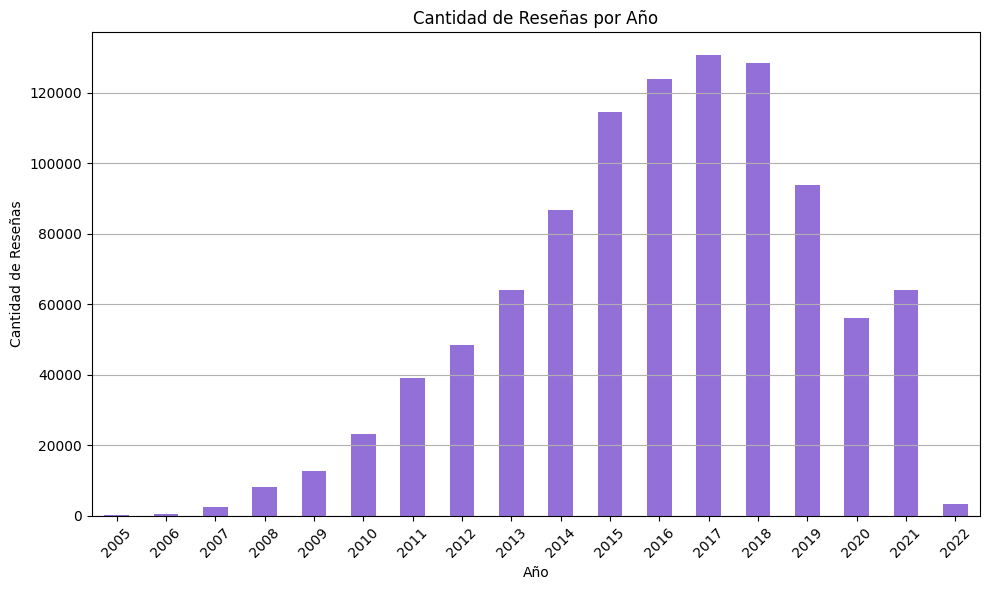

In [15]:
# Graficar los años con mayor cantidad de reseñas
reseñas_por_año = df['year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
reseñas_por_año.plot(kind='bar', color='#9370D8')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.title('Cantidad de Reseñas por Año')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

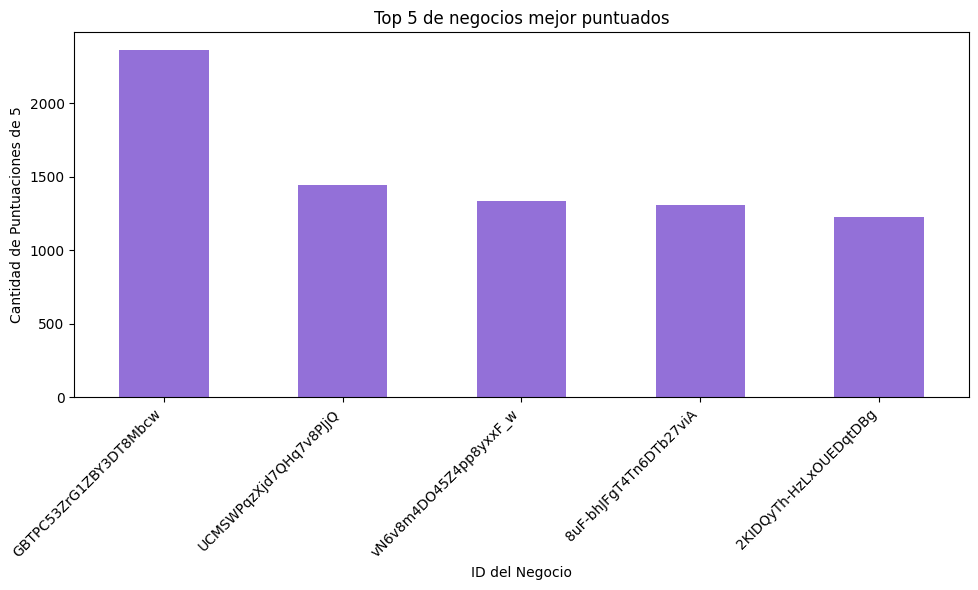

In [26]:
# Filtrar las puntuaciones de '5' en la columna 'stars'
puntuaciones_5 = df[df['stars'] == 5]

# Contar la cantidad de veces que cada negocio ha recibido puntuación de '5'
top_negocios_puntuaciones_5 = puntuaciones_5['business_id'].value_counts().head(5)

# Graficar el top 5 de negocios 
plt.figure(figsize=(10, 6))
top_negocios_puntuaciones_5.plot(kind='bar', color='#9370D8')
plt.xlabel('ID del Negocio')
plt.ylabel('Cantidad de Puntuaciones de 5')
plt.title('Top 5 de negocios mejor puntuados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusiones finales

Para el análisis del dataset que tuvimos que abordar, nos enfrentamos a un conjunto de datos extenso con casi 7 millones de registros. Para facilitar el Análisis Exploratorio de Datos (EDA), decidimos limitarnos al primer millón de registros. Esto nos permitió trabajar con un DataFrame de dimensiones (1000000, 9), lo cual simplificó el proceso de análisis y nos brindó un enfoque más manejable y eficiente.Luego del análisis exploratorio de un fragmento del dataset, se pueden extraer las siguientes conclusiones: 

**Valores nulos, faltantes y duplicados** :
- El dataset no presenta valores nulos ni faltantes, como así tampoco valores duplicados. Esto es un rasgo importante porque, de ser necesario, permite utilizar la totalidad de los campos para extraer información.

**Outliers** :
- Se identificaron outliers en las columnas 'useful' (0-539), 'funny' (0-254) y 'cool' (0-172). Estas columnas contienen datos numéricos que reflejan opiniones, sin embargo, el rango de puntuación abarca valores que van desde 0 hasta alrededor de 500. Esta variación sugiere la necesidad de tomar decisiones respecto a la interpretación de estos datos y definir un rango de puntuación adecuado.

**Usuarios y Negocios** :
- 542003 ususarios y 27095 negocios.

**Período de tiempo que abarca el dataset** :
- Este fragmento de 1.000.000, abarca el período comprendido entre **2005 y 2022**. 
- El período entre **2014 y 2019** el que mayor cantidad de reseñas tuvo.
 
**Otros datos** :
- Además, se identificó que el negocio cuyo id es **'GBTPC53ZrG1ZBY3DT8Mbcw'** es el más y mejor puntuado. Para esto se realizó un top 10 de los negocios más puntuados y un top 5 de aquellos con mejor puntuación. 
